## A post-VAD Speaker Counter

In [ ]:
import os
import random


import pandas as pd
import numpy as np


import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.nn.functional as F
import torchaudio.transforms as T
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader


from time import time
from tqdm import tqdm


from src import model as m                  # Config
from src.data import SpectrogramDataset     # Torch dataset object creator
from src.utils.helpers import *             # Helpers to build, train and evaluate the model. See `src/utils/helpers.py`


import random
import numpy as np
import torch


set_seed()

In [2]:
_df = pd.read_csv(r"data\labels\final_labels.csv")
_df.drop(_df[_df['speaker_count'] == '0'].index, inplace=True)    # Filter out noise/0-speaker samples
_df.to_csv(r"data\labels\final_labels_no_noise.csv", index=False) 
dataset = SpectrogramDataset(csv_file=r"data\labels\final_labels_no_noise.csv"); 

In [ ]:
# 1. init ConvCount model
model = build_model(m.config_postVAD, input_h=96, input_w=64)



# 2. Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# 3. DataLoaders
train_loader, val_loader = get_loaders(dataset)



# 4. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=m.config['lr'])



# 5. Training loop
for epoch in range(25):
    start_time = time()
    avg_loss, per_class_loss, class_counts = train_one_epoch(model, train_loader, optimizer, criterion, device, per_class=True)
    duration = time() - start_time

    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f} — Time: {duration:.2f}s")

    # Print per-class losses and sample counts seen this epoch
    print("Per-class training loss (avg per-sample) and counts:")
    for cls in sorted(per_class_loss.keys()):
        loss_val = per_class_loss[cls]
        cnt = class_counts[cls]
        if loss_val is None:
            print(f"  Class {cls}: no samples")
        else:
            print(f"  Class {cls}: loss={loss_val:.4f} (n={cnt})")
    print("-" * 60)



# 6. Final Validation 
acc = validate(model, val_loader, device)
print(f"Validation Accuracy: {acc:.2%}")



# 7. Save model
torch.save(model.state_dict(), r'src/model/ConvCount_postVAD.pt')

Training: 100%|██████████| 2614/2614 [28:47<00:00,  1.51batch/s]


Epoch 1 — Loss: 0.8262 — Time: 1727.05s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.1529 (n=23413)
  Class 2: loss=1.2999 (n=20105)
  Class 3: loss=1.0090 (n=20175)
  Class 4: loss=0.9539 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [36:03<00:00,  1.21batch/s]


Epoch 2 — Loss: 0.7765 — Time: 2163.95s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.1264 (n=23413)
  Class 2: loss=1.1976 (n=20105)
  Class 3: loss=0.9822 (n=20175)
  Class 4: loss=0.9068 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [37:11<00:00,  1.17batch/s]


Epoch 3 — Loss: 0.7575 — Time: 2231.72s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.1150 (n=23413)
  Class 2: loss=1.1641 (n=20105)
  Class 3: loss=0.9678 (n=20175)
  Class 4: loss=0.8891 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [30:17<00:00,  1.44batch/s]


Epoch 4 — Loss: 0.7446 — Time: 1817.72s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.1076 (n=23413)
  Class 2: loss=1.1371 (n=20105)
  Class 3: loss=0.9618 (n=20175)
  Class 4: loss=0.8769 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:11<00:00,  1.27batch/s]


Epoch 5 — Loss: 0.7379 — Time: 2051.43s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.1033 (n=23413)
  Class 2: loss=1.1252 (n=20105)
  Class 3: loss=0.9569 (n=20175)
  Class 4: loss=0.8709 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:03<00:00,  1.24batch/s]


Epoch 6 — Loss: 0.7307 — Time: 2103.60s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0992 (n=23413)
  Class 2: loss=1.1104 (n=20105)
  Class 3: loss=0.9522 (n=20175)
  Class 4: loss=0.8653 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [36:26<00:00,  1.20batch/s]


Epoch 7 — Loss: 0.7245 — Time: 2186.30s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0945 (n=23413)
  Class 2: loss=1.0974 (n=20105)
  Class 3: loss=0.9478 (n=20175)
  Class 4: loss=0.8623 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:22<00:00,  1.23batch/s]


Epoch 8 — Loss: 0.7196 — Time: 2122.83s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0920 (n=23413)
  Class 2: loss=1.0868 (n=20105)
  Class 3: loss=0.9450 (n=20175)
  Class 4: loss=0.8583 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [33:06<00:00,  1.32batch/s]


Epoch 9 — Loss: 0.7145 — Time: 1986.23s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0889 (n=23413)
  Class 2: loss=1.0730 (n=20105)
  Class 3: loss=0.9419 (n=20175)
  Class 4: loss=0.8575 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:23<00:00,  1.23batch/s]


Epoch 10 — Loss: 0.7089 — Time: 2123.15s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0837 (n=23413)
  Class 2: loss=1.0647 (n=20105)
  Class 3: loss=0.9368 (n=20175)
  Class 4: loss=0.8536 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [28:02<00:00,  1.55batch/s]


Epoch 11 — Loss: 0.7030 — Time: 1682.80s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0813 (n=23413)
  Class 2: loss=1.0518 (n=20105)
  Class 3: loss=0.9367 (n=20175)
  Class 4: loss=0.8447 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:51<00:00,  1.21batch/s]


Epoch 12 — Loss: 0.6990 — Time: 2151.70s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0781 (n=23413)
  Class 2: loss=1.0415 (n=20105)
  Class 3: loss=0.9339 (n=20175)
  Class 4: loss=0.8447 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:54<00:00,  1.25batch/s]


Epoch 13 — Loss: 0.6942 — Time: 2094.58s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0780 (n=23413)
  Class 2: loss=1.0335 (n=20105)
  Class 3: loss=0.9263 (n=20175)
  Class 4: loss=0.8407 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:22<00:00,  1.23batch/s]


Epoch 14 — Loss: 0.6883 — Time: 2122.33s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0733 (n=23413)
  Class 2: loss=1.0227 (n=20105)
  Class 3: loss=0.9236 (n=20175)
  Class 4: loss=0.8350 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:09<00:00,  1.28batch/s]


Epoch 15 — Loss: 0.6841 — Time: 2049.65s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0715 (n=23413)
  Class 2: loss=1.0117 (n=20105)
  Class 3: loss=0.9207 (n=20175)
  Class 4: loss=0.8338 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:44<00:00,  1.25batch/s]


Epoch 16 — Loss: 0.6809 — Time: 2084.56s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0689 (n=23413)
  Class 2: loss=1.0047 (n=20105)
  Class 3: loss=0.9196 (n=20175)
  Class 4: loss=0.8313 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:10<00:00,  1.24batch/s]


Epoch 17 — Loss: 0.6772 — Time: 2110.32s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0662 (n=23413)
  Class 2: loss=0.9973 (n=20105)
  Class 3: loss=0.9187 (n=20175)
  Class 4: loss=0.8276 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:39<00:00,  1.26batch/s]


Epoch 18 — Loss: 0.6729 — Time: 2079.82s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0642 (n=23413)
  Class 2: loss=0.9926 (n=20105)
  Class 3: loss=0.9100 (n=20175)
  Class 4: loss=0.8250 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [30:43<00:00,  1.42batch/s]


Epoch 19 — Loss: 0.6701 — Time: 1843.73s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0632 (n=23413)
  Class 2: loss=0.9833 (n=20105)
  Class 3: loss=0.9114 (n=20175)
  Class 4: loss=0.8226 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [23:13<00:00,  1.88batch/s]


Epoch 20 — Loss: 0.6655 — Time: 1393.17s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0603 (n=23413)
  Class 2: loss=0.9744 (n=20105)
  Class 3: loss=0.9092 (n=20175)
  Class 4: loss=0.8180 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [35:50<00:00,  1.22batch/s]


Epoch 21 — Loss: 0.6620 — Time: 2150.54s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0575 (n=23413)
  Class 2: loss=0.9718 (n=20105)
  Class 3: loss=0.9046 (n=20175)
  Class 4: loss=0.8136 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [34:49<00:00,  1.25batch/s]


Epoch 22 — Loss: 0.6591 — Time: 2089.86s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0573 (n=23413)
  Class 2: loss=0.9629 (n=20105)
  Class 3: loss=0.9026 (n=20175)
  Class 4: loss=0.8128 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [32:56<00:00,  1.32batch/s]


Epoch 23 — Loss: 0.6548 — Time: 1976.72s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0554 (n=23413)
  Class 2: loss=0.9540 (n=20105)
  Class 3: loss=0.8991 (n=20175)
  Class 4: loss=0.8094 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [32:37<00:00,  1.34batch/s]


Epoch 24 — Loss: 0.6526 — Time: 1957.12s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0531 (n=23413)
  Class 2: loss=0.9506 (n=20105)
  Class 3: loss=0.8981 (n=20175)
  Class 4: loss=0.8073 (n=19955)
------------------------------------------------------------


Training: 100%|██████████| 2614/2614 [30:03<00:00,  1.45batch/s]


Epoch 25 — Loss: 0.6499 — Time: 1803.71s
Per-class training loss (avg per-sample) and counts:
  Class 0: no samples
  Class 1: loss=0.0518 (n=23413)
  Class 2: loss=0.9418 (n=20105)
  Class 3: loss=0.8987 (n=20175)
  Class 4: loss=0.8060 (n=19955)
------------------------------------------------------------
Validation Accuracy: 61.43%


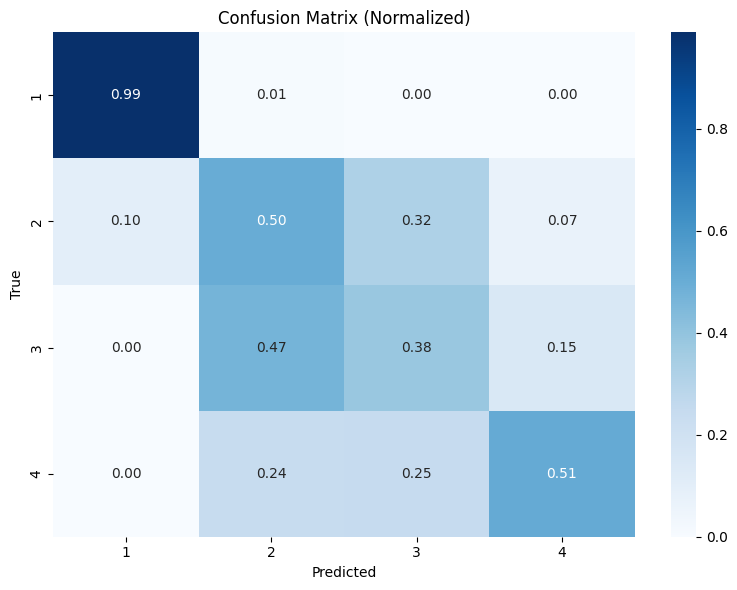


Per-Class Accuracy:
  Class 1: 0.989
  Class 2: 0.503
  Class 3: 0.384
  Class 4: 0.510

Precision / Recall / F1 Score per Class:
  Class 1: Precision=0.919, Recall=0.989, F1=0.953
  Class 2: Precision=0.423, Recall=0.503, F1=0.460
  Class 3: Precision=0.387, Recall=0.384, F1=0.386
  Class 4: Precision=0.702, Recall=0.510, F1=0.591


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def evaluate_classification(y_true, y_pred, class_labels=None, normalize_cm=False):
    """
    Computes and visualizes confusion matrix, per-class accuracy, and precision/recall/F1.

    Args:
        y_true (array-like): Ground truth labels (integers).
        y_pred (array-like): Predicted labels (integers).
        class_labels (list[int], optional): List of integer class labels (e.g., [0,1,2,3,4]).
            If None, it's inferred from y_true and y_pred.
        normalize_cm (bool): Whether to normalize confusion matrix rows.

    Returns:
        dict: Dictionary containing metrics and the confusion matrix.
    """
    metrics = {}

    # Infer class labels if not provided
    if class_labels is None:
        unique = set(np.unique(y_true)).union(np.unique(y_pred))
        class_labels = sorted(int(x) for x in unique)

        # If predictions/targets don't include all expected classes (e.g., want 0..4),
        # a caller can pass class_labels explicitly. We keep inference conservative.

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    if normalize_cm:
        # avoid divide-by-zero rows
        with np.errstate(all='ignore'):
            cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
            cm = np.nan_to_num(cm)  # convert NaNs to 0 for empty rows

    metrics['confusion_matrix'] = cm
    metrics['class_labels'] = class_labels

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize_cm else "d",
                xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix" + (" (Normalized)" if normalize_cm else ""))
    plt.tight_layout()
    plt.show()

    # Per-Class Accuracy
    per_class_acc = {}
    for cls in class_labels:
        cls_mask = np.array(y_true) == cls
        if cls_mask.sum() == 0:
            per_class_acc[cls] = None
        else:
            acc = accuracy_score(np.array(y_true)[cls_mask], np.array(y_pred)[cls_mask])
            per_class_acc[cls] = acc
    metrics['per_class_accuracy'] = per_class_acc

    print("\nPer-Class Accuracy:")
    for cls in class_labels:
        acc = per_class_acc[cls]
        if acc is None:
            print(f"  Class {cls}: (no true samples)")
        else:
            print(f"  Class {cls}: {acc:.3f}")

    # Precision, Recall, F1 Score
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=class_labels, zero_division=0
    )
    metrics['precision'] = dict(zip(class_labels, precision))
    metrics['recall'] = dict(zip(class_labels, recall))
    metrics['f1_score'] = dict(zip(class_labels, f1))

    print("\nPrecision / Recall / F1 Score per Class:")
    for cls in class_labels:
        print(f"  Class {cls}: Precision={metrics['precision'][cls]:.3f}, "
              f"Recall={metrics['recall'][cls]:.3f}, F1={metrics['f1_score'][cls]:.3f}")

    return metrics


def evaluate_model_metrics(model, loader, device, class_labels=None):
    """
    Run model on loader and evaluate. class_labels is optional (list of ints).
    If class_labels is None it will be inferred from the data (y_true/y_pred).
    """
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            logits = model(x)
            preds = logits.argmax(dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(y.cpu().numpy())

    y_true = np.array(y_true, dtype=int)
    y_pred = np.array(y_pred, dtype=int)

    # If user passed class_labels, use that; otherwise infer a sensible range
    if class_labels is None:
        unique = set(np.unique(y_true)).union(np.unique(y_pred))
        class_labels = sorted(int(x) for x in unique)
        
    return evaluate_classification(y_true, y_pred, class_labels=class_labels, normalize_cm=True)



metrics = evaluate_model_metrics(model, val_loader, device)
# or to force classes 1..4:
# metrics = evaluate_model_metrics(model, val_loader, device, class_labels=[1,2,3,4])
